# Data Analysis Miniterm
### A notebok prepared by Cullen Roth | Magwene Lab

## Load in needed mods and ftns

In [1]:
import numpy as np ## Numpy is a useful family of functions in python for basic analysis
import pandas as pd ## Pandas is a groupof functions for loading in files and manipulate dataframes
from matplotlib import pyplot as plt ## Matplotib allows us to make pretty figures
from scipy.optimize import curve_fit ## The curve fit ftn allows us to fit curves

In [2]:
%matplotlib inline

### Define Ftns for growth analysis

In [3]:
def gompertz(t,A,u,l):
    """Gompertz growth equation"""
    y = A * np.exp(-np.exp(((u*np.exp(1)/A)*(l-t))+1))
    return y

def r_squared(y,y_approx):
    """Calculates the coefficent of determination"""
    residuals = y - y_approx;
    ss_res = np.sum(residuals**2);
    ss_tot = np.sum((y-np.mean(y))**2);
    return 1.0 - (ss_res / ss_tot)

## Bring in our data and transform it

#### This spits out a warning but it seems we may ignore it. 

In [4]:
my_path_name = '/Users/croth/Documents/miniterm_2018/20180216_Miniterm_20180219.xls' ## You may have to change this
all_data_plate = pd.read_excel(my_path_name,skiprows=2)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [5]:
all_data_plate.shape

(133, 202)

In [6]:
all_data_plate.head()

,Time,Blank,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,200
0,00:01:17,0,0.062,0.061,0.061,0.061,0.061,0.060,0.061,0.061,...,0.066,0.072,0.068,0.070,0.069,0.072,0.070,0.069,0.070,0.070
1,00:30:06,0,0.059,0.058,0.058,0.058,0.059,0.057,0.057,0.057,...,0.060,0.065,0.063,0.065,0.064,0.067,0.063,0.064,0.064,0.065
2,01:00:06,0,0.059,0.058,0.058,0.058,0.058,0.057,0.059,0.059,...,0.060,0.065,0.064,0.065,0.067,0.068,0.065,0.064,0.064,0.065
3,01:30:06,0,0.059,0.058,0.058,0.058,0.058,0.057,0.058,0.058,...,0.060,0.065,0.064,0.066,0.068,0.070,0.065,0.064,0.065,0.065
4,02:00:06,0,0.060,0.059,0.058,0.059,0.059,0.058,0.059,0.059,...,0.061,0.071,0.067,0.068,0.070,0.070,0.069,0.071,0.065,0.067


## Rename our columns

In [7]:
old_names = all_data_plate.columns.tolist()[2:] ## Take the old sample names

In [8]:
old_names[:5] ## Print the first 5

[u'1', u'2', u'3', u'4', u'5']

In [9]:
front_name = 'test' ## Set a temporary name
new_names = [ front_name + a for a in old_names ] ## Add this temporary name to the old numeral name

In [10]:
new_names[:5] ## print the first 5

[u'test1', u'test2', u'test3', u'test4', u'test5']

In [11]:
all_data_plate.columns = ['Time','Blank'] + new_names ## Reset the old names in dataframe to new ones

In [12]:
all_data_plate.head() ## Show first 5 rows of data

,Time,Blank,test1,test2,test3,test4,test5,test6,test7,test8,...,test191,test192,test193,test194,test195,test196,test197,test198,test199,test200
0,00:01:17,0,0.062,0.061,0.061,0.061,0.061,0.060,0.061,0.061,...,0.066,0.072,0.068,0.070,0.069,0.072,0.070,0.069,0.070,0.070
1,00:30:06,0,0.059,0.058,0.058,0.058,0.059,0.057,0.057,0.057,...,0.060,0.065,0.063,0.065,0.064,0.067,0.063,0.064,0.064,0.065
2,01:00:06,0,0.059,0.058,0.058,0.058,0.058,0.057,0.059,0.059,...,0.060,0.065,0.064,0.065,0.067,0.068,0.065,0.064,0.064,0.065
3,01:30:06,0,0.059,0.058,0.058,0.058,0.058,0.057,0.058,0.058,...,0.060,0.065,0.064,0.066,0.068,0.070,0.065,0.064,0.065,0.065
4,02:00:06,0,0.060,0.059,0.058,0.059,0.059,0.058,0.059,0.059,...,0.061,0.071,0.067,0.068,0.070,0.070,0.069,0.071,0.065,0.067


### Get the time informations from the original data!

In [13]:
time = all_data_plate['Time'].values ## From the dataframe, by name, take the time column 
time[:5] ## Show first 5 samples of time. Well this is ugly! 

array([u'00:01:17', u'00:30:06', u'01:00:06', u'01:30:06', u'02:00:06'], dtype=object)

## Seperate via group
For the two groups the data was stored in the same dataframe. Luckely we are python savvy and can index the columns each group needs

### Make an index to columns for each of the two groups
Don't forget to account for the time and blank columns 

In [14]:
group1_index = np.arange(1,101,1) + 1 ## This works 
group1_index = np.arange(2,102,1) ## or this
group1_data = all_data_plate.ix[:,group1_index] ## For group 1, take the columns from the left in the index
group1_data.head() ## Show the first 5 rows of data for group 1. Did it work?

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,...,test91,test92,test93,test94,test95,test96,test97,test98,test99,test100
0,0.062,0.061,0.061,0.061,0.061,0.060,0.061,0.061,0.062,0.062,...,0.068,0.065,0.066,0.068,0.066,0.070,0.080,0.066,0.068,0.070
1,0.059,0.058,0.058,0.058,0.059,0.057,0.057,0.057,0.058,0.058,...,0.064,0.061,0.062,0.065,0.062,0.066,0.075,0.060,0.062,0.065
2,0.059,0.058,0.058,0.058,0.058,0.057,0.059,0.059,0.059,0.059,...,0.066,0.063,0.062,0.065,0.066,0.068,0.079,0.061,0.063,0.065
3,0.059,0.058,0.058,0.058,0.058,0.057,0.058,0.058,0.059,0.059,...,0.066,0.062,0.064,0.066,0.065,0.068,0.080,0.061,0.063,0.065
4,0.060,0.059,0.058,0.059,0.059,0.058,0.059,0.059,0.059,0.060,...,0.072,0.069,0.064,0.066,0.066,0.068,0.081,0.062,0.063,0.066


In [15]:
group1_data.shape ## Check the shape of the data

(133, 100)

In [16]:
group2_index = np.arange(101,201,1) + 1 ## Offeset vai one to get the correct columsn
group2_data = all_data_plate.ix[:,group2_index] ## For group 2, take index to columns from the left 
group2_data.head() ## Check that this worked for group 2. Did it work?!

,test101,test102,test103,test104,test105,test106,test107,test108,test109,test110,...,test191,test192,test193,test194,test195,test196,test197,test198,test199,test200
0,0.066,0.064,0.065,0.063,0.068,0.064,0.066,0.062,0.070,0.064,...,0.066,0.072,0.068,0.070,0.069,0.072,0.070,0.069,0.070,0.070
1,0.062,0.058,0.059,0.058,0.062,0.058,0.060,0.057,0.067,0.059,...,0.060,0.065,0.063,0.065,0.064,0.067,0.063,0.064,0.064,0.065
2,0.064,0.059,0.061,0.058,0.063,0.059,0.062,0.058,0.067,0.060,...,0.060,0.065,0.064,0.065,0.067,0.068,0.065,0.064,0.064,0.065
3,0.064,0.059,0.060,0.058,0.063,0.059,0.061,0.058,0.067,0.060,...,0.060,0.065,0.064,0.066,0.068,0.070,0.065,0.064,0.065,0.065
4,0.068,0.060,0.061,0.058,0.063,0.059,0.062,0.059,0.067,0.060,...,0.061,0.071,0.067,0.068,0.070,0.070,0.069,0.071,0.065,0.067


In [17]:
group2_data.shape ## Check the sape of gorup 2 data. These should also be 133 X 100

(133, 100)

# Plot the data and look at it! 
##### A cardinal sin in data analysis is not looking at the data! 

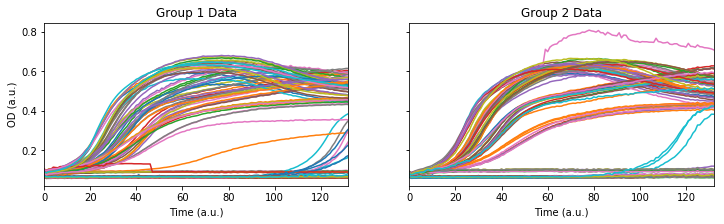

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,3),sharex='all',sharey='all'); ## Call a figure
## Plot the first group
plt.sca(ax[0]) ## Set the first axis in the subplot
plt.ylabel('OD (a.u.)'); ## Add some labels! 
plt.xlabel('Time (a.u.)');
plt.title('Group 1 Data');
group1_data.plot(legend=False,ax=ax[0]); ## from the dataframe plot to first axis
## Plot the second
group2_data.plot(legend=False,ax=ax[1]); ## from the dataframe plot to second axis
plt.sca(ax[1]); ## Set the current axis to the second axis
plt.xlabel('Time (a.u.)'); ## Label x axis
plt.title('Group 2 Data'); ## label the title

# Conduct some analysis
Here we need to transfrom our data first, taking the first time point and subtracting it from the rest of the data. Then we will try to fit gompertz curves to these initialized samples. Note, this may not work for all of the samples given the curve's shape. I'll conduct this basic analysis first for group 1's data. 

#### Parametric Approach (Gompertz fits)
Our goal below is to fit curves to initialized curves to calculate the parameters A, u, and l (carrying capacity, max growth rate, and lag). In this notebook I have conducted this first pass analysis via the Gompertz model. 

#### (A basic) Non-parametric approach 
In each of the given curves it is easy to gather the maximum OD from the data. Even if curves didn't grow well and our code is unable to fit curves we can compare these max values. 

#### Generate a usable time variable

In [19]:
new_time = np.arange(0,len(all_data_plate['Time']),1)/2.0 ## Creat and convert time!

In [20]:
len(new_time) ## Check how many their are! Should be 133. 

133

#### Compare our new time to the old time vector

In [21]:
print(time[:5]) ## Print first 5 in vector 
print(new_time[:5]) ## print first 5 in vector (so much nicer)

[u'00:01:17' u'00:30:06' u'01:00:06' u'01:30:06' u'02:00:06']
[ 0.   0.5  1.   1.5  2. ]


# Set the data set (group one or two) to be looked at

In [22]:
data = group1_data.copy() ## If you are group two, you can comment out or delete this line of code for your data. 
##data = group2_data.copy() ## If you are group two, you can uncomment this code to run the same analysis

## Initialize and take Max values (non-parametric approach)

In [23]:
sample_names = data.columns.tolist() ## This list of samples
first_values = [] ## Initialize lists, this will contain the first time pts of each value. 
initialized_curves = [] ## This list will contain the curves with first value sub tracted
the_maxs = [] ## Initialize the list that will contain the max values of the curves
for sample in sample_names: ## iterate over all the samples in group1 data
    tempdata = data[sample] ## Take the sample data
    first_val = tempdata.values[0] ## Get the first value
    first_values.append(first_val) ## Append the first value
    initialized = tempdata.values-first_val ## Subtract the first value
    initialized_curves.append(initialized) ## Apppend the initialized curve
    the_maxs.append(np.max(initialized)) ## Take the max of the initialized curve

### Look at the distribution of initial starting values (first time point)

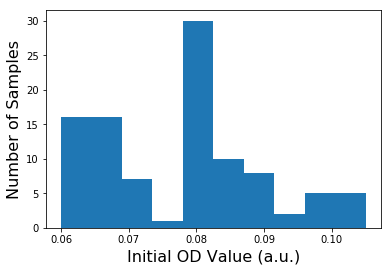

In [24]:
plt.hist(first_values);
plt.ylabel('Number of Samples',fontsize=16);
plt.xlabel('Initial OD Value (a.u.)',fontsize=16);

## Fit Gompertz Models to each sample (parametric approach)

In [25]:
curve_params = []
for curve in initialized_curves:
    try: ## To fit a curve to the data
        params, B = curve_fit(gompertz,new_time,curve)
    except RuntimeError: ## This "error" happens when we try to force a curve to a slow / no grower
        params = [] ## The sample did not grow well / enough
    curve_params.append(params) ## Append params

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/croth/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [26]:
## How many curves could we get data for. 
print len([p for p in curve_params if len(p) > 0])

89


In [27]:
yhats_gomp = []
for param in curve_params:
    if len(param) > 0:
        yhat = gompertz(new_time,*param)
    else:
        yhat = []
    yhats_gomp.append(yhat)

/Users/croth/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
## How many curves could we make a model for
len([y for y in yhats_gomp if len(y)>0])

89

### Calculate coefficent of variaiton 

In [29]:
## Calculate R2s 
Rsqs = []
c = 0
for yhat in yhats_gomp:
    if len(yhat) == len(initialized_curves[c]):
        Rsq = r_squared(initialized_curves[c],yhat)
    else:
        Rsq = 0
    Rsqs.append(Rsq)
    c = c + 1 ## An iterator that counts our index for us

In [30]:
## Check how many curves have an Rsq value 
len(Rsqs)

100

In [31]:
## Check how many curves have an Rsq value above zero
len([r for r in Rsqs if r > 0])

70

In [32]:
## How many curves have an Rsq value above 0.90?
len([r for r in Rsqs if r > 0.90])

53

## Figure 1: Growth Data, Gompertz Fits, and R-squared Values
Below, we have in dashed black lines the growth across samples and in red lines, their gompertz fits. Plots missing red lines are samples we are unable to fit models to. An R-squared value of the gompertz fits is included in the upper left corner. 

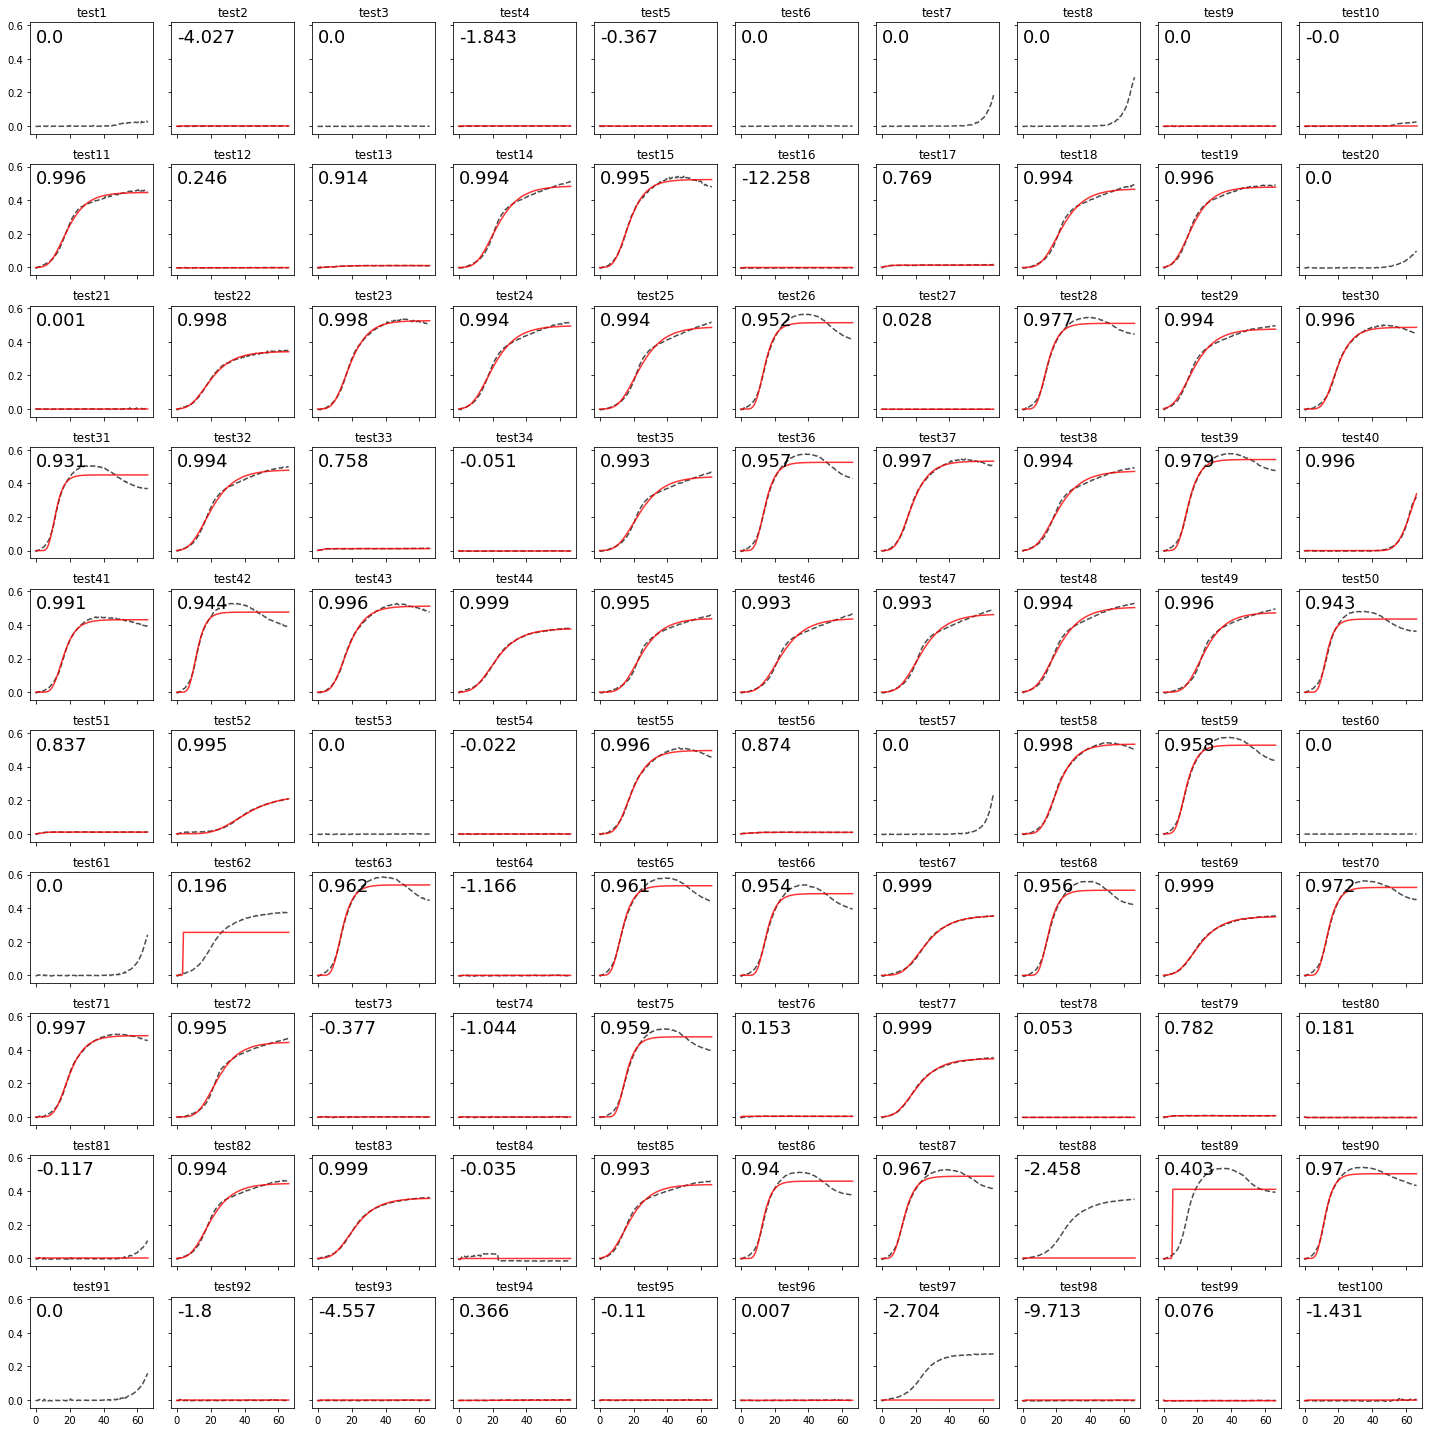

In [33]:
fig, ax = plt.subplots(10,10, figsize = (20,20),sharex='all',sharey='all')
c = 0
for sample in sample_names:
    plt.sca(ax.ravel()[c])
    plt.plot(new_time,initialized_curves[c],'k--',alpha=0.7)
    plt.plot(new_time[:len(yhats_gomp[c])],yhats_gomp[c],'r-',alpha=0.8)
    plt.annotate(str(round(Rsqs[c],3)),(.3,.5),fontsize=18);
    plt.title(sample)
    c = c + 1
plt.tight_layout();
##my_save_path = 'growth_curves_raw.png'
##fig.savefig(my_save_path,dpi=300);

## Filtering Fits
As we can see above, many of the R-squares are low (less than 0.5), not available (zero), or nonsense (less than zero), suggesting poor fits. Also several samples failed to grow. We may want to filter out these samples and only use the parameters from good fits. Below is a histogram of the R-squared values from our attempts at fitting growth curves. 

## Figure 2) Histogram of R-squared values

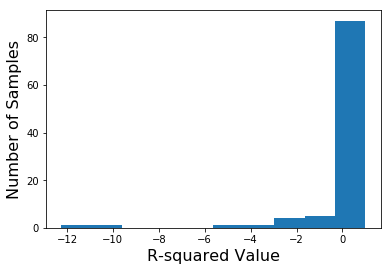

In [34]:
plt.hist(Rsqs); ## Note these values should be between 0 and 1 ... awkward. 
plt.xlabel('R-squared Value',fontsize=16);## Add labels 
plt.ylabel('Number of Samples',fontsize=16);

### Samples that we should keep in our analysis
Here I'm setting a threshold of 0.90 for R-squared values given the visulization in figure 1 above

In [35]:
threshold = 0.90 ## Our R-squared threshold
samples_to_keep_name = [] ## A list that will hold the names of the samples we keep. 
samples_to_keep_index = [] ## A list that will hold the index to the samples we keep. 
c = 0 ## our iterator
for sample in sample_names:
    if Rsqs[c] > threshold:
        samples_to_keep_name.append(sample)
        samples_to_keep_index.append(c)
    else:
        pass
    c = c + 1

##### Check how many samples are kept in our analysis

In [36]:
len(samples_to_keep_name)

53

In [37]:
## Print the samples indexs we are keeping in the plot
print samples_to_keep_index

[10, 12, 13, 14, 17, 18, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 54, 57, 58, 62, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 81, 82, 84, 85, 86, 89]


## Gather Parameters for analysis
Recall we generated our parameters form curve fitting above and saved them in a variable. Here we only want the parameters from well fit curves

In [38]:
## We will use the nice abilities of arrays and for loops to get our parameters
## Recall we know the order of the parameters since the appear as A, u and l in the gompertz ftn.
## See ?gompetz for detail. 
As = np.array([a[0] for a in np.array(curve_params)[np.array(samples_to_keep_index)]])
Mus = np.array([a[1] for a in np.array(curve_params)[np.array(samples_to_keep_index)]])
Lags = np.array([a[2] for a in np.array(curve_params)[np.array(samples_to_keep_index)]])

In [39]:
## Don't forget we looked at the max growth for each sample. 
## We can collect these as well for our kept samples
Mgs = np.array(the_maxs)[np.array(samples_to_keep_index)]

## Figure 3) Histograms of each of the parameters 
Here we will plot histograms of each of the parameters and also include our point estimates of max gorwth

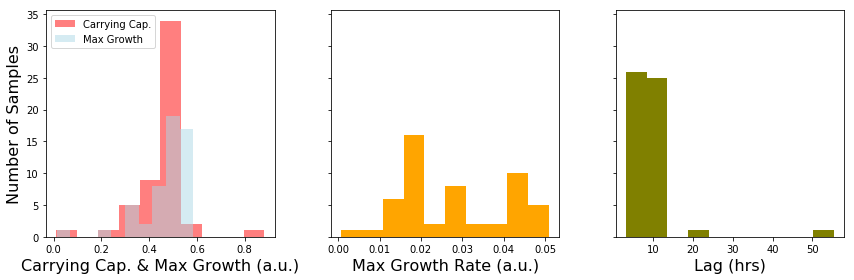

In [40]:
fig, ax = plt.subplots(1,3,figsize=(12,4),sharex=False,sharey='row')
plt.sca(ax[0])
plt.hist(As,color='red',alpha=0.5,label='Carrying Cap.')
plt.hist(Mgs,color='lightblue',alpha=0.5,label='Max Growth')
plt.ylabel('Number of Samples',fontsize=16)
plt.xlabel('Carrying Cap. & Max Growth (a.u.)',fontsize=16)
plt.legend() ## Add a legend 
plt.sca(ax[1])
plt.hist(Mus,color='orange')
plt.xlabel('Max Growth Rate (a.u.)',fontsize=16)
plt.sca(ax[2])
plt.hist(Lags,color='olive')
plt.xlabel('Lag (hrs)',fontsize=16)
plt.tight_layout();

# What now?
Here I've shown you how to fit curves to data (passing data that displays poor or no growth), generate parameters for analysis, and plot both growth data and visulize parameters. We utilized here the gompertz growth model to generate (for a subset of the curves) parameters of interest. We also used a basic non-parametric apporach and extracted the max OD from each of the samples. Moving forward, you will need to incorrporate information from the experiment to examine differences in parameters between groups, mutants, and/or across conditions. 